In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii, fits
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
import splat
%matplotlib inline

In [3]:
DATA_FOLDER='/users/caganze/research/J1624/data/'
FIG_FOLDER='/users/caganze/research/J1624/figures/'

In [4]:
Vizier.ROW_LIMIT = -1 
catalogs = Vizier.get_catalogs('J/AJ/157/231')

In [5]:
#kiman=catalogs[0].to_pandas()
kiman_master=Table(fits.open(DATA_FOLDER+'/MLSDSSGaiaDR2.fits')[1].data)

In [6]:
keys0=[k for k in kiman_master.columns if k not in  ['PSFMAG', 'PSFMAG_ERR', 'EXTINCTION', 'MAG_2MASS', 'MAG_ERR_2MASS']]
kiman=kiman_master[keys0].to_pandas()

In [7]:
lateMs=pd.read_excel(DATA_FOLDER+'/UCD_lateM_dwarf_precision_RV_20pc_thin_disk_population.xlsx')

In [8]:
cth=Table(fits.open(DATA_FOLDER+'/DR7_TOT_6_1.fits')[1].data)

In [9]:
keys=[k for k in cth.columns if k not in  ['PSFMAG', 'PSFMAGERR', 'EXTINCTION']]

In [10]:
theissen=cth[keys].to_pandas()

In [11]:
merged=pd.merge(theissen, kiman,  how='left', on=['MJD', 'FIBER', 'PLATE'],  validate='one_to_one')

In [12]:
len(merged), len(kiman), len(theissen)

(70840, 74216, 70840)

In [13]:
#merged.EWHA_x

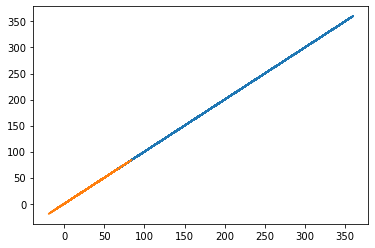

In [14]:
plt.plot(merged.RA_x, merged.RA_y)
plt.plot(merged.DEC_x, merged.DEC_y)

In [15]:
#merged.to_hdf(DATA_FOLDER+'/merged_Mdwarfs.h5', key='merged')

In [18]:
gcs=Vizier.get_catalogs('J/A+A/530/A138')

In [20]:
#cross-match with merged

gcs[0]

Name,m_Name,H09,logg,Teff,Fbol,__Fe_H_,__a_Fe_,RAJ2000,DEJ2000,RV,ageMLP,M.MLP,SimbadName
,,,[cm/s2],K,mW / m2,[Sun],[Sun],"""h:m:s""","""d:m:s""",km / s,Gyr,Msun,
bytes12,bytes4,bytes3,float32,float32,float32,float32,float32,bytes10,bytes9,float32,float32,float32,bytes22
HD 23,,H09,4.44,6203.0,2.72e-08,-0.07,0.01,00 05 07.4,-52 09 06,34.3,0.00,1.13,HD 23
HD 67,,H09,4.58,5746.0,8.285e-09,-0.09,0.07,00 05 28.4,-61 13 33,6.3,0.10,0.98,HD 67
HD 101,,H09,4.41,5957.0,2.831e-08,-0.24,0.14,00 05 54.7,+18 14 06,-45.6,2.20,1.04,HD 101
HD 105,,H09,4.43,6035.0,2.641e-08,-0.18,0.09,00 05 52.5,-41 45 11,1.6,0.20,1.07,HD 105
HD 153,,H09,3.91,5869.0,1.224e-08,0.08,-0.02,00 06 26.0,+42 45 09,-31.8,3.80,1.22,HD 153
HD 156,,H09,3.70,6730.0,2.965e-08,0.25,-0.15,00 06 24.9,-18 02 17,13.6,1.20,1.89,HD 156
HD 189,,H09,3.79,6374.0,1.041e-08,0.13,-0.07,00 06 39.5,-24 37 15,7.6,2.10,1.55,HD 189
HD 200,,H09,3.87,5998.0,1.404e-08,-0.21,0.10,00 06 46.9,-04 21 00,-0.2,3.50,1.23,HD 200


In [35]:

coo_gcs = SkyCoord(gcs[0]['RAJ2000'], gcs[0]['DEJ2000'], unit=(u.hourangle, u.deg), obstime="J2000")
coo_gaia = SkyCoord(merged.RA_x.values*u.deg, merged.DEC_x.values*u.deg, obstime='J2000')


In [43]:
#coo_gcs.ra

In [37]:
#SkyCoord?

In [39]:
idx_sdss, d2d_sdss, d3d_sdss = coo_gaia.match_to_catalog_sky(coo_gcs)


In [44]:
d2d_sdss.arcsec

array([2151.21145783, 3883.25587144, 4538.91055976, ..., 2454.37143347,
       2229.30058331, 2352.76497348])

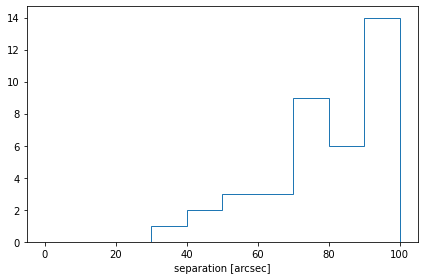

In [46]:
plt.hist(d2d_sdss.arcsec, histtype='step', range=(0,100))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

(array([  16.,   87.,  231.,  746., 1368., 2443., 3674., 4202., 3142.,
         728.]),
 array([4033. , 4355.5, 4678. , 5000.5, 5323. , 5645.5, 5968. , 6290.5,
        6613. , 6935.5, 7258. ], dtype=float32),
 <BarContainer object of 10 artists>)

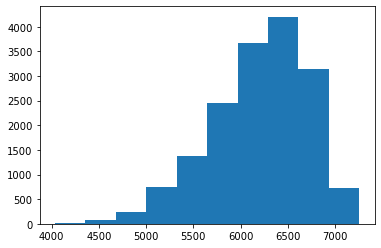

In [49]:
#cross-match with merged

plt.hist(gcs[0]['Teff'], range=(300))

In [53]:
gcs[0].to_pandas().to_csv(DATA_FOLDER+'/gcs_catalog.csv')

In [55]:
DATA_FOLDER+'/gcs_catalog.csv'

'/users/caganze/research/J1624/data//gcs_catalog.csv'